In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Telco_Customer_Churn.csv")
print("Dataset:\n",data.head())
print("Dataset Shape:\n",data.shape)
print("Dataset:\n",data.isnull().sum())

Dataset:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Con

In [ ]:
print("DataSet Data Types:\n", data.dtypes)

DataSet Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
object_col= data.select_dtypes(include= ['object']).columns
print("Object Columns:\n", object_col)

Object Columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


# Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
data_co= data.copy()

In [ ]:
Binary_col= ['Partner','Dependents','PhoneService',
             'OnlineSecurity', 'OnlineBackup', 'TechSupport',
             'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
             'Churn','DeviceProtection']

In [ ]:
Binary_col_en= ['Partner_en','Dependents_en','PhoneService_en',
             'OnlineSecurity_en', 'OnlineBackup_en', 'TechSupport_en',
             'StreamingTV_en', 'StreamingMovies_en', 'PaperlessBilling_en',
             'Churn_en', 'DeviceProtection_en']

In [ ]:
data_co[Binary_col_en] = data_co[Binary_col].apply(le.fit_transform)

In [ ]:
print(le.classes_)

['No' 'No internet service' 'Yes']


In [ ]:
print("Category Mapping")
for cat, code in zip(le.classes_, range(len(le.classes_))):
  print(f"{cat}: {code}")

Category Mapping
No: 0
No internet service: 1
Yes: 2


**MultipleLines**

In [ ]:
data_co['MultipleLines_en']= le.fit_transform(data_co['MultipleLines'])
print(le.classes_)

['No' 'No phone service' 'Yes']


In [ ]:
print("Category Mapping:")
for cat, code in zip(le.classes_, range(len(le.classes_))):
  print(f"{cat}: {code}")

Category Mapping:
No: 0
No phone service: 1
Yes: 2


**InternetService**

In [ ]:
data_co['InternetService_en']= le.fit_transform(data_co['InternetService'])
print(le.classes_)

['DSL' 'Fiber optic' 'No']


In [ ]:
print("Category Mapping:")
for cat, code in zip(le.classes_, range(len(le.classes_))):
  print(f"{cat}: {code}")

Category Mapping:
DSL: 0
Fiber optic: 1
No: 2


**Contract**

In [ ]:
data_co['Contract_en']= le.fit_transform(data_co['Contract'])
print(le.classes_)

['Month-to-month' 'One year' 'Two year']


In [ ]:
print("Category Mapping:")
for cat, code in zip(le.classes_, range(len(le.classes_))):
  print(f"{cat}: {code}")

Category Mapping:
Month-to-month: 0
One year: 1
Two year: 2


**PaymentMethod**

In [ ]:
data_co['PaymentMethod_en']= le.fit_transform(data_co['PaymentMethod'])
print(le.classes_)

['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [ ]:
print("Category Mapping:")
for cat, code in zip(le.classes_, range(len(le.classes_))):
  print(f"{cat}: {code}")

Category Mapping:
Bank transfer (automatic): 0
Credit card (automatic): 1
Electronic check: 2
Mailed check: 3


In [ ]:
data_co['gender_en']= le.fit_transform(data_co['gender'])
print(le.classes_)

['Female' 'Male']


In [ ]:
print("Category Mapping:")
for cat, code in zip(le.classes_, range(len(le.classes_))):
  print(f"{cat}: {code}")

Category Mapping:
Female: 0
Male: 1


In [ ]:
data_co.drop(columns=Binary_col, inplace=True)

In [ ]:
data_co.drop(columns=['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'gender'], inplace=True)

In [ ]:
data_co['TotalCharges'] = pd.to_numeric(data_co['TotalCharges'], errors='coerce')
data_co['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-3946189696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_co['TotalCharges'].fillna(0, inplace=True)


In [ ]:
data_co['customerID'] = pd.to_numeric(data_co['customerID'], errors='coerce')
data_co['customerID'].fillna(0, inplace=True)

/tmp/ipython-input-2144107050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_co['customerID'].fillna(0, inplace=True)


In [ ]:
print("Data Label encode:\n", data_co.head())

Data Label encode:
    customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0         0.0              0       1           29.85         29.85   
1         0.0              0      34           56.95       1889.50   
2         0.0              0       2           53.85        108.15   
3         0.0              0      45           42.30       1840.75   
4         0.0              0       2           70.70        151.65   

   Partner_en  Dependents_en  PhoneService_en  OnlineSecurity_en  \
0           1              0                0                  0   
1           0              0                1                  2   
2           0              0                1                  2   
3           0              0                0                  2   
4           0              0                1                  0   

   OnlineBackup_en  ...  StreamingTV_en  StreamingMovies_en  \
0                2  ...               0                   0   
1                0  ... 

In [ ]:
print("DataSet Data_le Types:\n", data_co.dtypes)

DataSet Data_le Types:
 customerID             float64
SeniorCitizen            int64
tenure                   int64
MonthlyCharges         float64
TotalCharges           float64
Partner_en               int64
Dependents_en            int64
PhoneService_en          int64
OnlineSecurity_en        int64
OnlineBackup_en          int64
TechSupport_en           int64
StreamingTV_en           int64
StreamingMovies_en       int64
PaperlessBilling_en      int64
Churn_en                 int64
DeviceProtection_en      int64
MultipleLines_en         int64
InternetService_en       int64
Contract_en              int64
PaymentMethod_en         int64
gender_en                int64
dtype: object


# Correlation

In [ ]:
corr_matrix= data_co.corr()

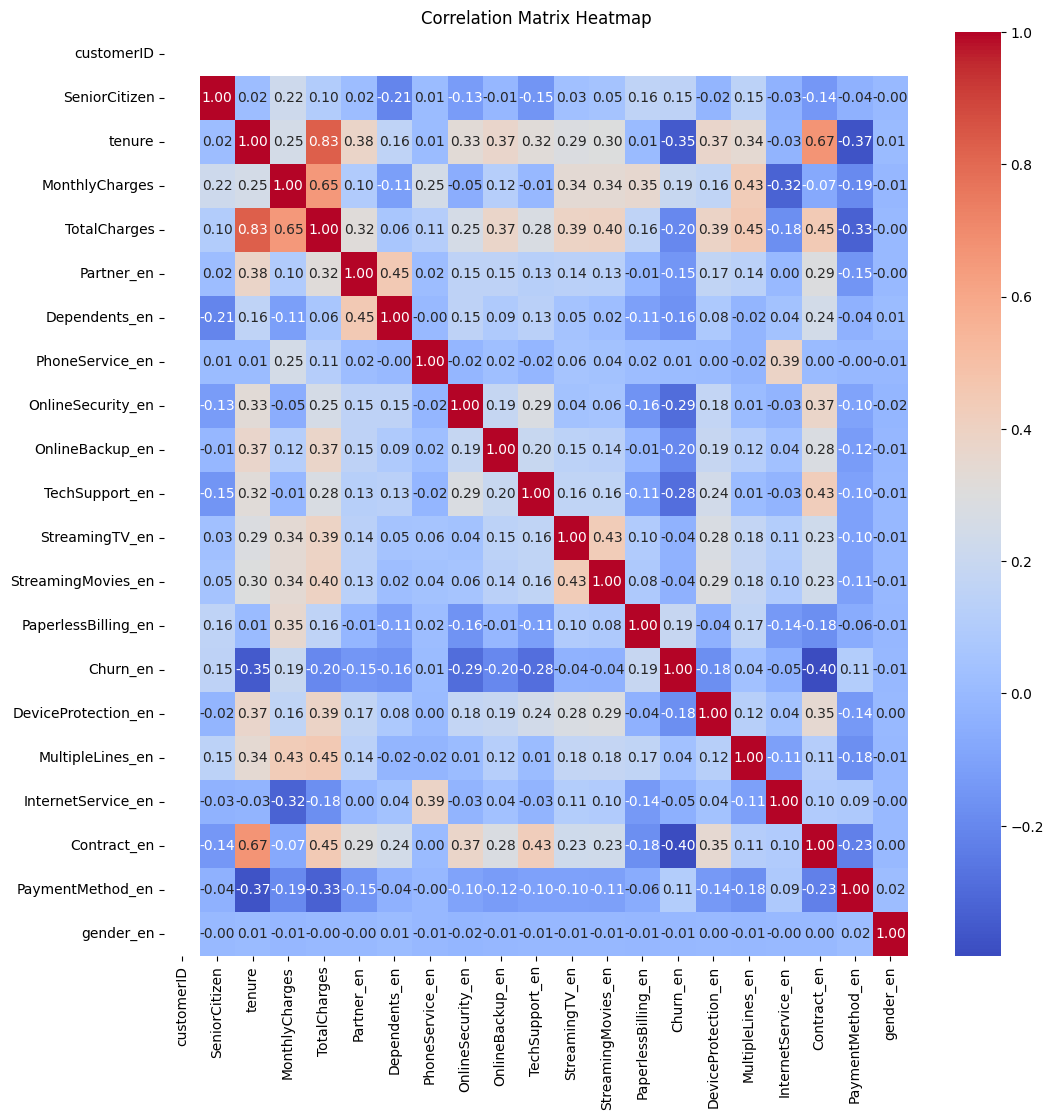

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x= data_co.drop(columns= ['Churn_en'])
y= data_co['Churn_en']

In [ ]:
LogRe= LogisticRegression(max_iter= 1000)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
LogRe.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred= LogRe.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8161816891412349


In [ ]:
print(data_co['Churn_en'].value_counts(normalize= True))

Churn_en
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[934 102]
 [157 216]]


In [ ]:
print("Training Accuracy:", LogRe.score(x_train, y_train))
print("Testing Accuracy:", LogRe.score(x_test, y_test))

Training Accuracy: 0.8006744763933262
Testing Accuracy: 0.8161816891412349


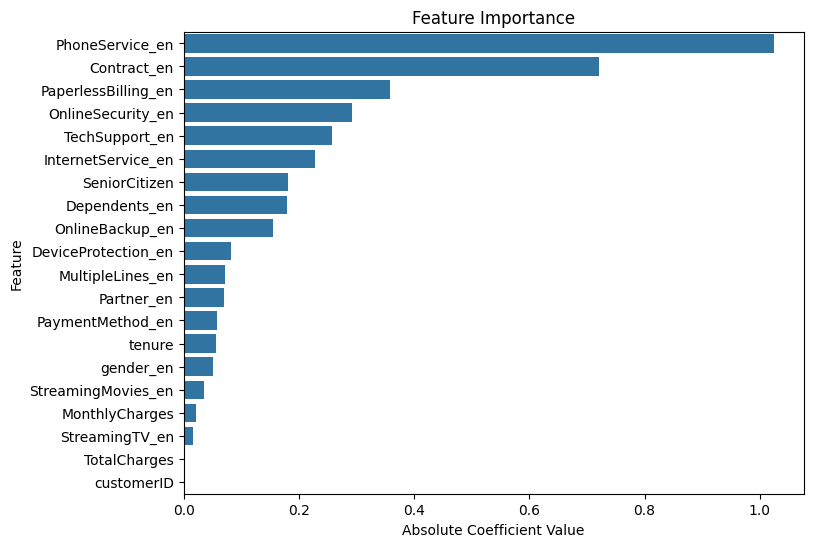

In [ ]:
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': LogRe.coef_[0]
})
importance['Abs_Coefficient'] = np.abs(importance['Coefficient'])
importance = importance.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x='Abs_Coefficient', y='Feature',data=importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
y_prob= LogRe.predict_proba(x_test)


In [ ]:
y_prob_class1 = y_prob[:, 1]

In [ ]:
threshold = 0.5
y_labels = ['No' if prob >= threshold else 'Yes' for prob in y_prob_class1]
x_test_labeled = x_test.copy()
x_test_labeled['Actual'] = y_test.values
x_test_labeled['Probability_of_Default'] = y_prob_class1
x_test_labeled['Predicted_Label'] = y_labels

In [ ]:
print(x_test_labeled['Predicted_Label'].value_counts())

Predicted_Label
Yes    1091
No      318
Name: count, dtype: int64


# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced')

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred2= rfc.predict(x_test)

In [ ]:
accuracy= accuracy_score(y_test, y_pred2)
print("Accuracy:\n", accuracy)

Accuracy:
 0.8041163946061036


In [ ]:
y_prob2= rfc.predict_proba(x_test)

In [ ]:
y_prob2_class1 = y_prob2[:, 1]

In [ ]:
threshold = 0.5
y_labels2= ['No' if prob >= threshold else 'Yes' for prob in y_prob_class1]
x_test_labeled2= x_test.copy()
x_test_labeled2['Actual'] = y_test.values
x_test_labeled2['Probability_of_Default'] = y_prob2_class1
x_test_labeled2['Predicted_Label'] = y_labels

In [ ]:
print(x_test_labeled2['Predicted_Label'].value_counts())

Predicted_Label
Yes    1091
No      318
Name: count, dtype: int64


In [ ]:
print("Training Accuracy:", rfc.score(x_train, y_train))
print("Testing Accuracy:", rfc.score(x_test, y_test))

Training Accuracy: 0.9984025559105432
Testing Accuracy: 0.8041163946061036


In [ ]:
importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rfc.feature_importances_
})
importance = importance.sort_values(by='Importance', ascending=False)

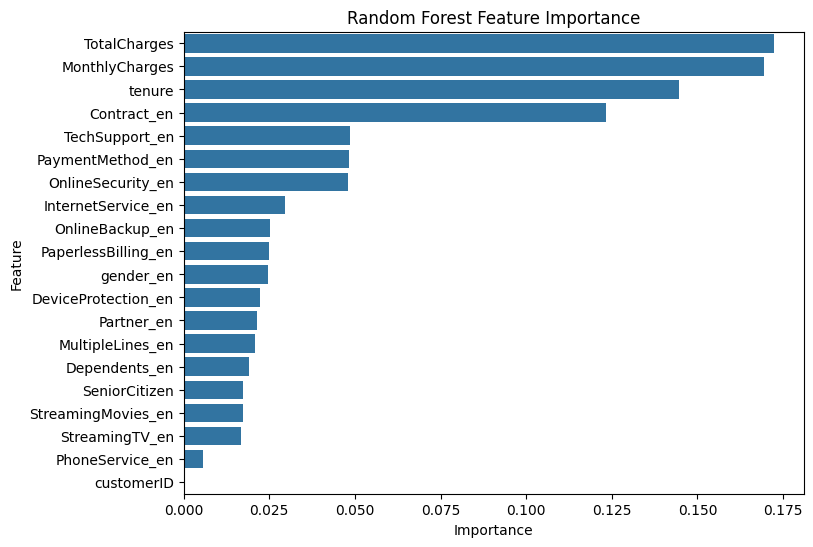

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Random Forest Feature Importance")
plt.show()

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_samples=1000, n_features=10, random_state=42)

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid= {
    'n_estimators': [50,100,200,300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
random_search= RandomizedSearchCV(
    estimator= gb,
    param_distributions= param_grid,
    n_iter= 20,
    cv= 5,
    scoring= 'accuracy',
    verbose= 2,
    random_state=42,
    n_jobs= -1
)

In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}


In [ ]:
best_model= random_search.best_estimator_

In [ ]:
y_pred2= best_model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8161816891412349


In [ ]:
importance2 = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': best_model.feature_importances_
})
importance2 = importance.sort_values(by='Importance', ascending=False)

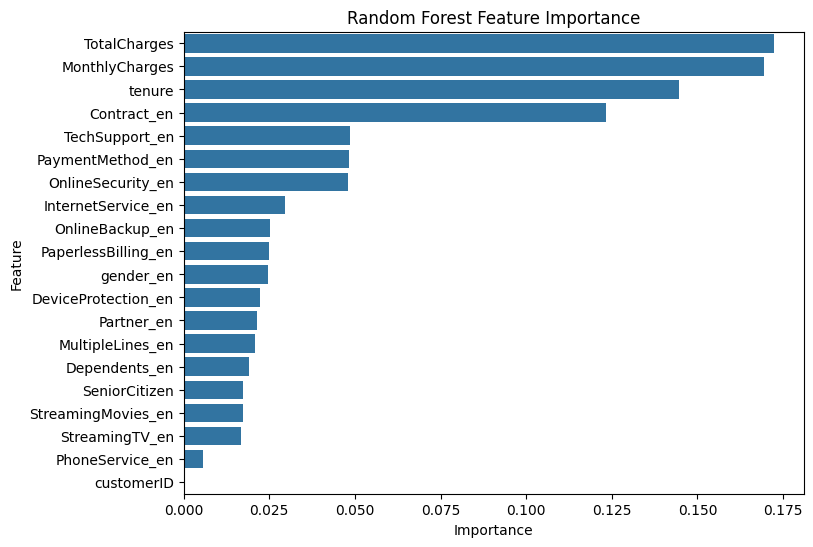

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Random Forest Feature Importance")
plt.show()